In [24]:
import codecs
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
base = sqlite3.connect ('fishing.db')

In [26]:
df = pd.read_sql("select g.gd,g.bet,s.player_name,s.place,s.points from score s join game g on s.game_id = g.id", base)

In [27]:
df.gd = df.gd.apply(pd.to_datetime)

# Определение очков за уму

In [28]:
def uma(place):
    if place ==1:
        u = 25000
    elif place ==2:
        u = 10000
    elif place ==3:
        u = -10000
    elif place ==4:
        u= -25000
    return u

# Выбираем период расчета

In [29]:
df = df[df.gd > pd.datetime(2017,1,1)]

# Определение выигранного вэлью за ханчан

In [30]:
df['umapoints'] = df['place'].apply(uma)
df['val'] = (df['bet']/100)*(((df['points']-25000+df['umapoints'])))

# Расчет статистики по выигранному валуе и построение графика профита

In [31]:
#подготовка датафрейма
df_val = df.drop(df.columns[[1,3,4,5]],1)
df_val_sum = df_val.groupby('player_name').sum()
#общий профит
df_val_sum.sort_values('val', ascending = False)

,val
player_name,
Алешин Сергей,30650.0
Плясунов Владислав,27903.0
Васильев Сергей,19896.0
Гришин Виктор,14163.0
Сироткин Дмитрий,11130.0
Мартынов Иван,8760.0
Ким Евгений,5712.0
Троценко Филипп,5465.0
Леонтьев Алексей,5207.0


In [32]:
#общее число ханчанов
df_val['player_name'].value_counts()

Черных Анастасия       410
Леонтьев Алексей       319
Васильев Сергей        283
Петрущенко Сергей      282
Плясунов Владислав     279
Алешин Сергей          260
Гришин Виктор          211
Гоголев Максим         129
Смоленцев Виктор        97
Проскурякова Ольга      91
Павлов Георгий          88
Наданьян Владимир       67
Сироткин Дмитрий        65
Манджиев Арслан         59
Ким Евгений             46
Мартынов Иван           42
Жевленев Егор           37
Гуркина Наталья         24
Усманов Рамиль          22
Ткаченко Никита         20
Козлов Виктор           12
Коновалов Михаил        11
Троценко Филипп          7
Ли Венлон                6
Белоусова Марина         6
Кретов Никита            4
Чечин Вадим              3
Афонин Михаил            2
Кваша Илья               1
Богатиков Александр      1
Name: player_name, dtype: int64

In [43]:
#по конкретному игроку и за период
df_player = df_val[(df_val.player_name == u'Васильев Сергей') & (df_val.gd >= pd.datetime(2017,1,1))]
#подготовительный расчет
s =[]
sum = 0
for i in df_player['val']:
    sum = sum + i 
    s.append(sum)

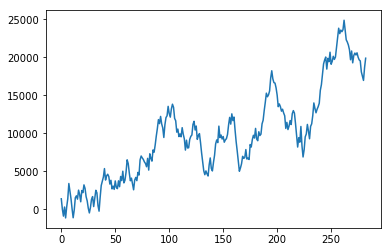

In [44]:
#построение графика (х:ханчаны, у:валуе)
plt.plot(s)